### Applied Statistics

#### Data Description:
The data at hand contains medical costs of people characterized by certain attributes.

#### Context:
Leveraging customer information is paramount for most businesses. In the case of an
insurance company, attributes of customers like the ones mentioned below can be crucial in
making business decisions. Hence, knowing to explore and generate value out of such data
can be an invaluable skill to have.

#### Attribute Information:
<ul>
    <li><b>age:</b> age of primary beneficiary</li>
    <li><b>sex:</b> insurance contractor gender, female, male</li>
    <li><b>bmi:</b> Body mass index, providing an understanding of body, weights that are relatively high
    or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height
    to weight, ideally 18.5 to 24.9</li>
    <li><b>children:</b> Number of children covered by health insurance / Number of dependents</li>
    <li><b>smoker:</b> Smoking</li>
    <li><b>region:</b> the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.</li>
    <li><b>charges:</b> Individual medical costs billed by health insurance.</li>
</ul>

#### Objective:
Deep dive into this data to find some valuable insights.

### Steps and tasks:

<h5>1. Import the necessary libraries</h5>

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<h5>2. Read the data as a data frame</h5>

In [2]:
dataframe = pd.read_csv("insurance.csv")
dataframe.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h5>3. Perform basic EDA which should include the following and print out your insights at every step.</h5>

a. Shape of the data

In [3]:
print("Shape of the Data is: ", dataframe.shape)

Shape of the Data is:  (1338, 7)


b. Data type of each attribute

In [4]:
print("Data type of each attribute:")
print(dataframe.dtypes)

Data type of each attribute:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


c. Checking the presence of missing values

In [5]:
print("Presence of missing values in each attribute:")
print(dataframe.isnull().sum())

Presence of missing values in each attribute:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


d. 5 point summary of numerical attributes

In [6]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

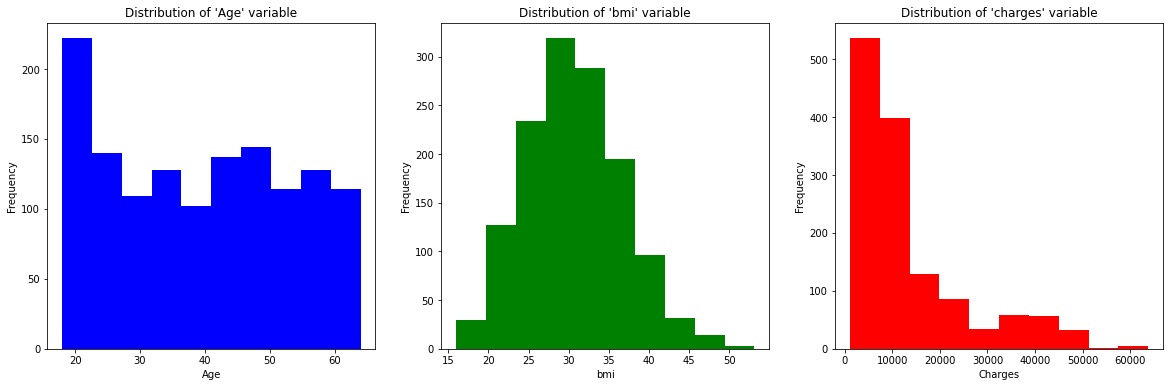

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
ax1.hist(dataframe["age"], color='blue')
ax1.set_title("Distribution of 'Age' variable")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")

ax2.hist(dataframe["bmi"], color='green')
ax2.set_title("Distribution of 'bmi' variable")
ax2.set_xlabel("bmi")
ax2.set_ylabel("Frequency")

ax3.hist(dataframe["charges"], color='red')
ax3.set_title("Distribution of 'charges' variable")
ax3.set_xlabel("Charges")
ax3.set_ylabel("Frequency")

plt.show()

##### Note: (from above Distribution plots)
(i) In whole dataset consist of different different age customers and maximum customers have age around 20 but customers are uniformly distributed according to their age approx.<br>
(ii) According to Body Mass index, most of the customers have around 30 bmi and this bmi distibution is normally distributed.<br>
(iii) Charges of customers are distributed as right skewed (Positive Skewed) graph. There is some extreme charges are present like more than 50000.<br>

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [8]:
print("Skewness of bmi, age and charges: ")
print(dataframe.skew())

Skewness of bmi, age and charges: 
age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64


g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

(I) Using Box-and-Whishker Plot:

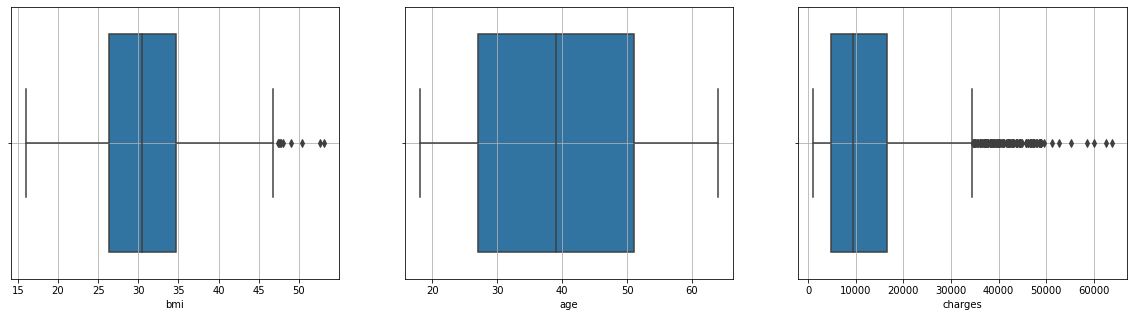

In [9]:
# using boxplot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# bmi
sns.boxplot(x=dataframe["bmi"], ax=ax1)
ax1.grid()

# age
sns.boxplot(x=dataframe["age"], ax=ax2)
ax2.grid()

# charges
sns.boxplot(x=dataframe["charges"], ax=ax3)
ax3.grid()

plt.show()

##### Note (from above Box Plots):
<ol>
    <li>In <b>bmi</b> column: There are some outliers present like some people bmi's are beyond 50 also.</li>
    <li>In <b>age</b> column: There is no outliers present in age column.</li>
    <li>In <b>charges</b> column: According to box plot of charges, there is many outliers present and some are beyond 50000.</li>
</ol>

h. Distribution of categorical columns (include children)

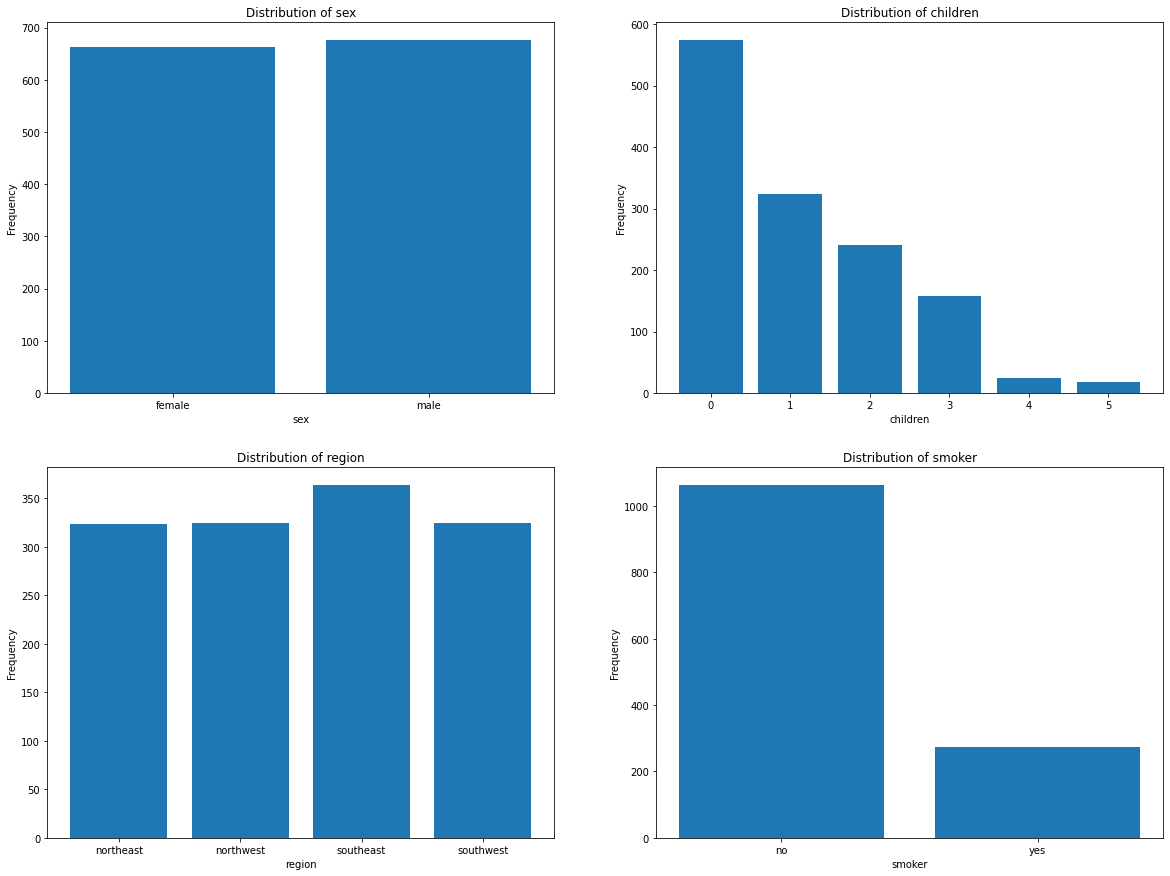

In [10]:
# categ_col = "sex"
cols = [["sex", "children"], ["region", "smoker"]]
# 
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

for i in range(2):
    for j in range(2):
        x = list(dataframe.groupby(cols[i][j])[cols[i][j]].count().keys())
        h = list(dataframe.groupby(cols[i][j])[cols[i][j]].count().values)
        ax[i, j].bar(x=x, height=h)
        ax[i, j].set_title("Distribution of {}".format(cols[i][j]))
        ax[i, j].set_xlabel(cols[i][j])
        ax[i, j].set_ylabel("Frequency")

plt.show()

#### Note:
(i) According to sex distibution plot, Ratio between female and male is approximately equal.<br>
(ii) According to children distibution plot, more than 500 customers didn't have any children and also, some of the customers have 4 or 5 children.<br>
(iii) According to region distribution plot, maximum customers are from southeast region.<br>
(iv) According to smoker distribution plot, more than 1000 customers don't smoke but still more than 200 customers are smoker.<br>

i. Pair plot that includes all the columns of the data frame

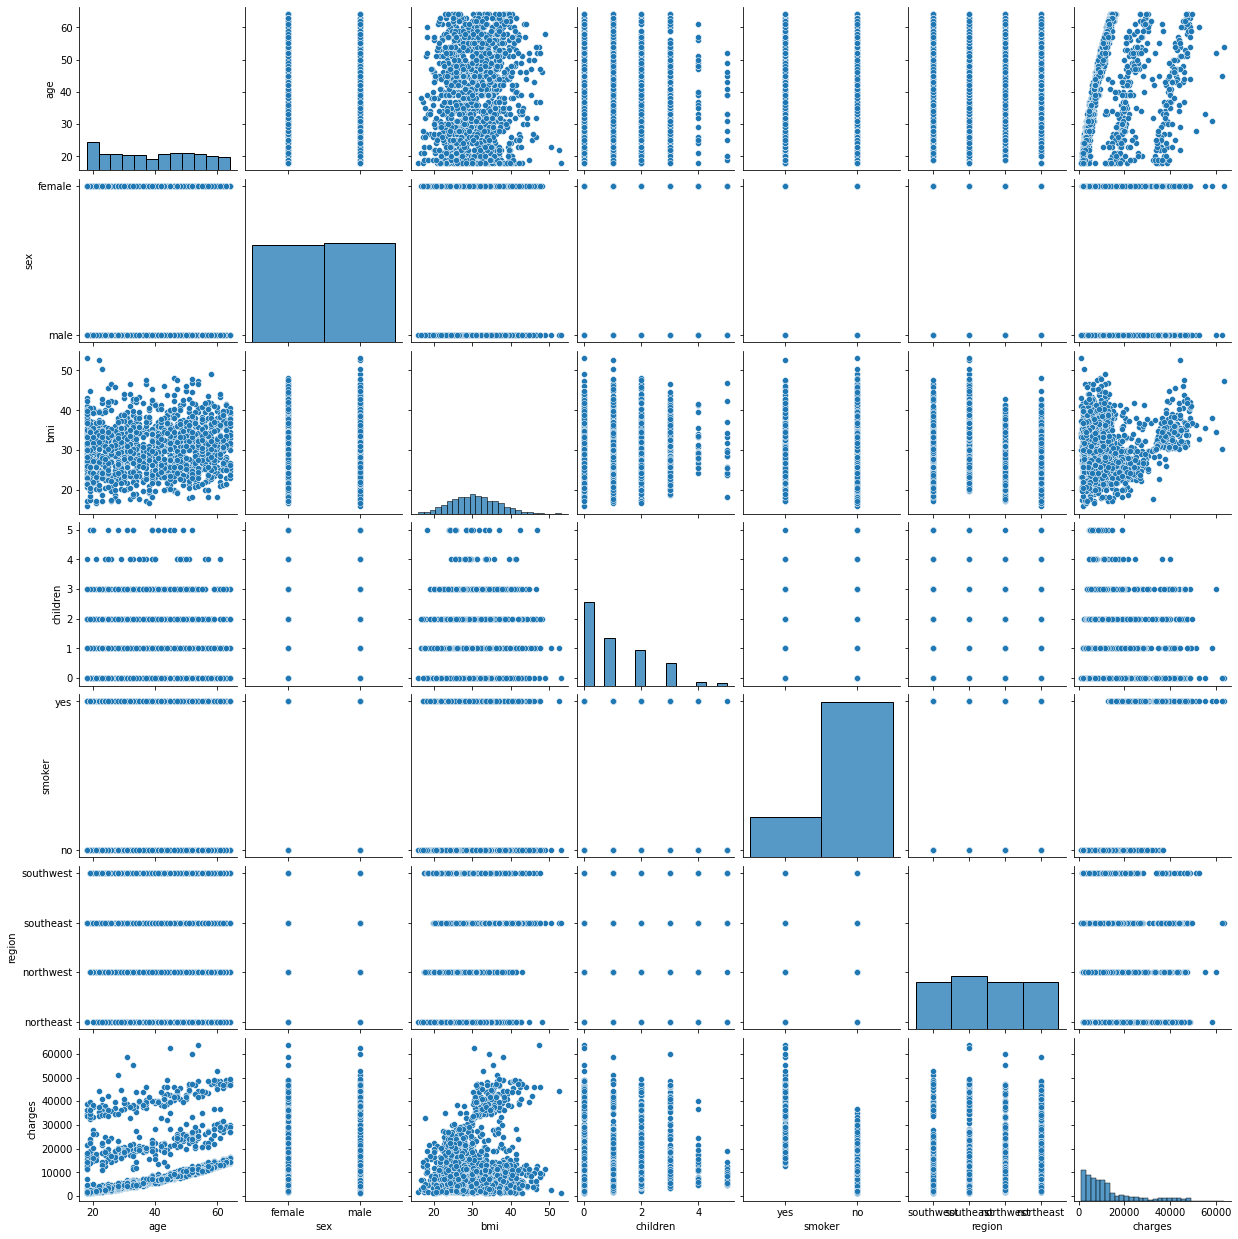

In [11]:
# pair plot of all columns
sns.pairplot(dataframe, vars=list(dataframe.columns))
plt.show()

##### 4. Answer the following questions with statistical evidence
<h5>a. Do charges of people who smoke differ significantly from the people who don't?</h5>

Split the data into two groups:<br>
<b>Group 1:</b> Charges of people who smoke<br>
<b>Group 2:</b> Charges of people who don't smoke<br><br>

Formulate Hypothesis (about population):<br>
<b>H0:</b> There is <b>NO</b> difference in charges of people who smoke or the people who don't smoke.<br>
<b>Ha:</b> There is a difference between charges of people who smoke or who don't.<br>

In [12]:
# array of charges of people who smoke
smoker_charges = ((dataframe[dataframe['smoker'] == 'yes'])['charges']).to_numpy()

# array of charges of people who don't smoke
non_smoker_charges = ((dataframe[dataframe['smoker'] == 'no'])['charges']).to_numpy()

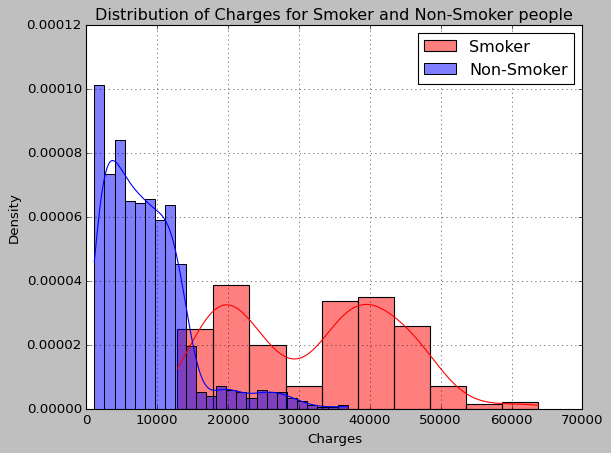

In [13]:
# visualize distribution plot for both the group
plt.style.use('classic')
sns.histplot(smoker_charges, label="Smoker", stat="density", kde=True, color="red")
sns.histplot(non_smoker_charges, label="Non-Smoker", stat="density", kde=True, color="blue")
plt.xlabel("Charges")
plt.title("Distribution of Charges for Smoker and Non-Smoker people")
plt.grid()
plt.legend()
plt.show()

##### Note:
According to sample data, we can visually see that charges of smokers and Non-smokers are different. That means, charges is high for people who smoke comparison to people who don't smoke. But just by visualizing we can't statistically prove that charges of people who smoke is different than who don't. So, for that we will do permutation test in order to prove it.

##### Permutation Testing:

Let set up Significance level (alpha) = 5%<br><br>

Simulate for 10000 steps:<br><br>

Ho: Population Median for two distribution (smoker and non smoker) is equal.<br>
Ha: Population Median for two distribution (smoker and non smoker) is not equal.<br>

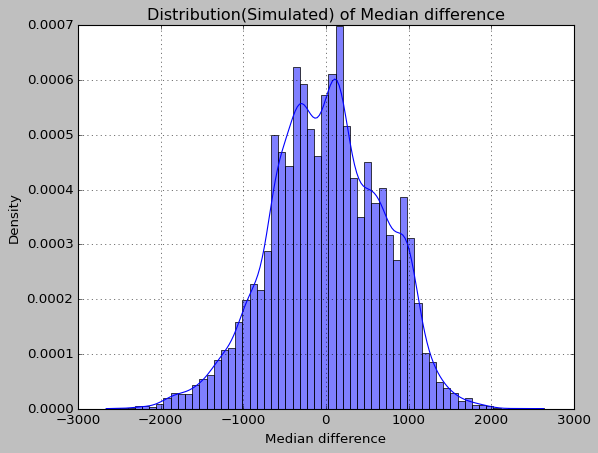

Difference between observed median charges for smoker and non-smoker group:  27110.9432
p-value:0.0


In [14]:
M = 10000
n = smoker_charges.shape[0]
m = non_smoker_charges.shape[0]

P = np.concatenate((smoker_charges, non_smoker_charges))

testStats = np.zeros(M)

# simulate for 10000 times
for i in range(M):
    np.random.shuffle(P)
    tmp_xc, tmp_xt = P[:n], P[n+1:]
    # Compute test-statistic
    testStats[i] = (np.percentile(tmp_xt, q=50) - np.percentile(tmp_xc, q=50))
    #testStats[i] = (np.mean(tmp_xt) - np.mean(tmp_xc))

# distribution plot of calculated test-statistics
sns.histplot(testStats, stat='density', kde=True)
plt.xlabel("Median difference")
plt.title("Distribution(Simulated) of Median difference")
plt.grid()
plt.show()

# observed value of (median of smoker_charges) - (median of non_smoker_charges) 
m_obs =  (np.percentile(smoker_charges,50) - np.percentile(non_smoker_charges,50))
#m_obs = np.mean(smoker_charges) - np.mean(non_smoker_charges)

print("Difference between observed median charges for smoker and non-smoker group: ", round(m_obs, 4))

k = np.sum(testStats >=  m_obs)
prob = k/M
print("p-value:" + str(prob))

##### Note:
(i) First, you can clearly see that the distribution(simulated) of the median difference of charges is close to normal distribution.<br>
(ii) Second, p-value is less than significance level. So, we reject the null hypothesis (Ho).<br><br>

<b>Conclusion:</b> Here, We have strong statistical evidence that there is difference in charges of people who smoke and people who don't.

<h5>b. Does bmi of males differ significantly from that of females?</h5>

Split the data into two groups:<br>
<b>Group 1:</b> Body Mass Index (bmi) of Males<br>
<b>Group 2:</b> Body Mass Index (bmi) of Females<br><br>

Formulate Hypothesis (about population):<br>
<b>H0:</b> There is <b>NO</b> difference in body mass index of males and females.<br>
<b>Ha:</b> There is a difference between body mass index of males and females.<br>

In [15]:
# array for male body masss index
male_bmi = (dataframe[dataframe["sex"] == 'male'])["bmi"].to_numpy()

# array for female body mass index
female_bmi = (dataframe[dataframe["sex"] == 'female'])["bmi"].to_numpy()

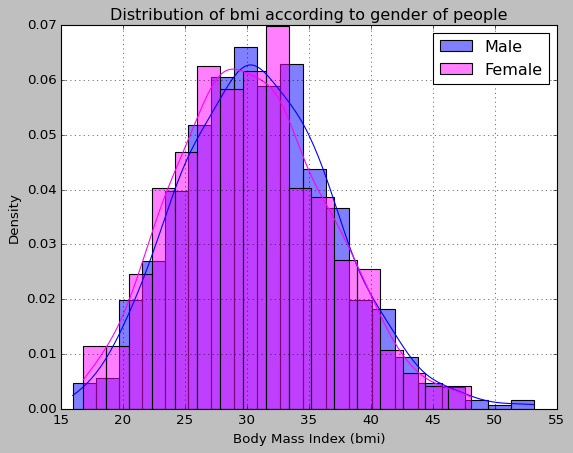

In [16]:
# visualize distribution plot for both the group
plt.style.use('classic')
sns.histplot(male_bmi, label="Male", stat="density", kde=True, color="blue")
sns.histplot(female_bmi, label="Female", stat="density", kde=True, color="magenta")
plt.xlabel("Body Mass Index (bmi)")
plt.title("Distribution of bmi according to gender of people")
plt.grid()
plt.legend()
plt.show()

##### Note:
According to above plot from sample bmi data of male and female, we can visually compare that distribution of bmi for male and female is same (close to normal distribution). That means, body mass index of male and female are equal. We will do t-test in order to prove it statistically.

##### T-Test (Two samples are independent and assumed Unequal population variances):

Ho: Population Mean bmi for these two distribution (males and females) is equal. i.e. mu1 = mu2<br>
Ha: Population Mean bmi for these two distribution (males and females) is not equal. i.e. mu1 != mu2<br>

Significance level (alpha) = 5%<br>

In [17]:
t_test_result = stats.ttest_ind(male_bmi, female_bmi, equal_var=False, alternative='two-sided')
#print("t statistics: ", t_test_result.statistic)
print("p-value: {}%".format(round(t_test_result.pvalue, 6) * 100))

p-value: 8.9924%


##### Note:
From above test, p-value (~9%) is greater than significance level (5%). So, we do not reject the null hypothesis.<br>
<b>Conclusion:</b> Here, we don't have enough statistical evidence in order to reject the null hypothesis. We can't say that there is difference in bmi of male and female. 

<h5>c. Is the proportion of smokers significantly different in different genders?</h5>

Hypothesis (about population):<br>
<b>H0:</b> There is <b>NO</b> significant difference in proportion of male smokers and female smokers. i.e. P1 = P2<br>
<b>Ha:</b> There is significant difference in proportion of male smokers and female smokers. i.e. P1 != P2<br>
where P1 is population proportion of male smokers, P2 is population proportion of female speakers 

In [18]:
total_males = (dataframe[dataframe['sex'] == 'male']).shape[0]
total_male_smokers = (dataframe[(dataframe['sex'] == 'male') & (dataframe['smoker'] == 'yes')]).shape[0]
prop_male_smokers = total_male_smokers / total_males

total_females = (dataframe[dataframe['sex'] == 'female']).shape[0]
total_female_smokers = (dataframe[(dataframe['sex'] == 'female') & (dataframe['smoker'] == 'yes')]).shape[0]
prop_female_smokers = total_female_smokers / total_females

print("Total Males: {}, Total Females: {}".format(total_males, total_females))
print("Total Male Smokers: {}, Total Female Smokers: {}".format(total_male_smokers, total_female_smokers))
print("Sample Proportion of Male Smokers: {}, Sample Proportion of Female Smokers: {}".format(round(prop_male_smokers, 4), 
                                                                                round(prop_female_smokers, 4)))

Total Males: 676, Total Females: 662
Total Male Smokers: 159, Total Female Smokers: 115
Sample Proportion of Male Smokers: 0.2352, Sample Proportion of Female Smokers: 0.1737


In [19]:
# Do 2 sample proportion test
def two_sample_prop_test(p1, p2, n1, n2):
    # calculate pooled proportion
    p_pool = ((n1*p1) + (n2*p2))/(n1+n2)
    
    x = (p_pool*(1-p_pool)*((1/n1)+(1/n2)))
    # standard error
    s = math.sqrt(x)
    
    # calculate z-statistics
    z = (p1 - p2)/s
    
    # calculate p-value
    if z < 0:
        p_value = stats.norm.cdf(z)
        
    else:
        p_value = 1 - stats.norm.cdf(z)
        
    return z, p_value*2 # two tailed

In [20]:
z, p_value = two_sample_prop_test(prop_male_smokers, prop_female_smokers, total_males, total_females)
print("P-value is : ", round(p_value, 4))

P-value is :  0.0053


##### Note:
From above test, p-value (~0.5%) is lesser than significance level (5%). So, we reject the null hypothesis.<br>
<b>Conclusion:</b> Here, we have sufficient statistical evidence in order to reject the null hypothesis. We can conclude that there is difference in population proportion of male smokers and female smokers.

<h5>d. Is the distribution of bmi across women with no children, one child and two
children, the same?</h5>

Hypothesis (about population):<br>
<b>Ho:</b> Distribution of bmi across women with no children, one child and two children is same. i.e. B<sub>1</sub> = B<sub>2</sub> = B<sub>3</sub><br>
<b>Ha:</b> Atleast one distribution of bmi across women with no children, one child and two children is different.<br> i.e. B<sub>i</sub> != B<sub>j</sub> for atleast one (i,j) (i!=j) and i, j belongs to {1, 2, 3}<br><br>
where,<br>
B<sub>1</sub> is population mean bmi of womens with no children,<br> 
B<sub>2</sub> is population mean bmi of womens with one child<br>
B<sub>3</sub> is population mean bmi of womens with two children<br>

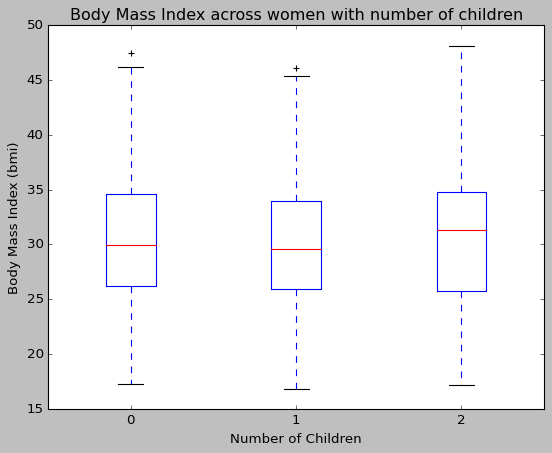

In [21]:
# group 1: body mass index of women with no children
female_bmi_with_no_children = ((dataframe[(dataframe["sex"] == 'female') & (dataframe["children"] == 0)])["bmi"]).to_numpy()
# group 2: body mass index of women with one child
female_bmi_with_one_child = ((dataframe[(dataframe["sex"] == 'female') & (dataframe["children"] == 1)])["bmi"]).to_numpy()
# group 3: body mass index of women with two children
female_bmi_with_two_children = ((dataframe[(dataframe["sex"] == 'female') & (dataframe["children"] == 2)])["bmi"]).to_numpy()

box_plot_data = [female_bmi_with_no_children, female_bmi_with_one_child, female_bmi_with_two_children]
plt.boxplot(box_plot_data)
plt.title("Body Mass Index across women with number of children")
plt.xticks(ticks=range(1,4), labels=[0, 1, 2])
plt.xlabel("Number of Children")
plt.ylabel("Body Mass Index (bmi)")
plt.show()

##### Note:
According to box plot of sample bmi data across women with no children, one child and two children, we can clearly see that all three distributions are same.

In order to prove it statistically, we will perform ANOVA (Analysis of Variance) test.

##### Anova test (Un-equal sample size)

significance level (alpha) = 5%

In [22]:
# Apply ANOVA test
anova_data = pd.DataFrame()
female_data_atmost_2_children = (dataframe[(dataframe["sex"]=='female') & (dataframe["children"]<=2)]).reset_index(0, drop=True)
anova_data["treatments"] = female_data_atmost_2_children.apply(lambda x: str(x["sex"]) + "_" + str(x["children"]), axis=1)
anova_data["bmi"] = (female_data_atmost_2_children["bmi"]).copy(deep=True)

# get anova table
result = ols("bmi ~ C(treatments)", data=anova_data).fit()
anova_table = sm.stats.anova_lm(result, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,24.590123,12.295062,0.334472,0.715858
Residual,563.0,20695.661583,36.759612,NaN,NaN


##### Note:
From above ANOVA F-test, p-value (~71.59%) is larger than significance level(5%). So, we cannot reject the null hypothesis.<br>
<b>Conclusion:</b><br> Here, we have insufficient statistical evidence in order to reject the null hypothesis.<br>We can conclude that there is <b>NO</b> difference in distribution of bmi across women with no children, one child and two children.